# Análise de dados espaciais

Utilizaremos:
- geopandas
- netCDF4
- xarray
- rasterio
Aprenderemos a abrir arquivos shapefile, recortar pontos, criar geometrias, abrir raster e arquivos netCDF.

## Intro ao geopandas

Funciona como o pandas, mas com funcionalidades adicionais que lidam com geometrias.
Este pacote permite plotarmos no espaço, abrir arquivos shapefile, recortar pontos, etc

In [1]:
import geopandas as gpd

In [2]:
# Leremos um arquivo shp usando o geopandas

path = r'C:\Users\bruno\Desktop\UFSC\2024.2\ENS410064\2024\dados_entrada\SC_distritos_CD2022\SC_distritos_CD2022.shp'

geodata =gpd.read_file(path)
geodata.head()

,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_RGINT,NM_RGINT,...,NM_CONCURB,AREA_KM2,v0001,v0002,v0003,v0004,v0005,v0006,v0007,geometry
0,4,Sul,42,Santa Catarina,4200051,Abdon Batista,420005105,Abdon Batista,4204,Chapecó,...,None,237.517070,2598,1335,1335,0,"2,7","0,0041",970,"POLYGON ((-51.04368 -27.64094, -51.04398 -27.6..."
1,4,Sul,42,Santa Catarina,4200101,Abelardo Luz,420010105,Abelardo Luz,4204,Chapecó,...,None,953.991566,17392,7189,7186,3,"2,9","0,0041",6070,"POLYGON ((-52.12152 -26.68147, -52.12169 -26.6..."
2,4,Sul,42,Santa Catarina,4200200,Agrolândia,420020005,Agrolândia,4207,Blumenau,...,None,206.815487,10990,4449,4445,4,"2,8","0,0429",3916,"POLYGON ((-49.83981 -27.52449, -49.83982 -27.5..."
3,4,Sul,42,Santa Catarina,4200309,Agronômica,420030905,Agronômica,4207,Blumenau,...,None,129.774156,6055,2598,2598,0,"2,7","0,0470",2232,"POLYGON ((-49.68847 -27.31815, -49.68822 -27.3..."
4,4,Sul,42,Santa Catarina,4200408,Água Doce,420040805,Água Doce,4204,Chapecó,...,None,288.659256,5527,2526,2522,4,"2,7","0,0005",2075,"POLYGON ((-51.53125 -27.05144, -51.53139 -27.0..."


<Axes: >

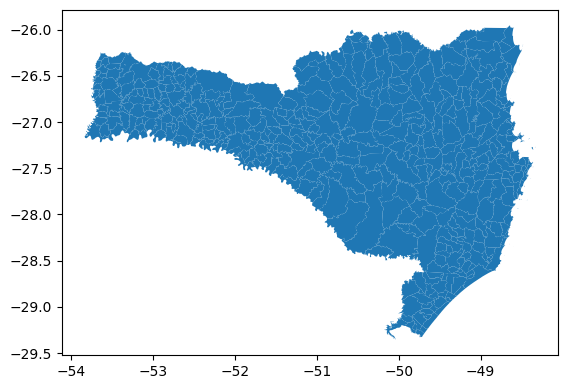

In [3]:
# Plotando utilizando matplotlib

geodata.plot()

<Axes: >

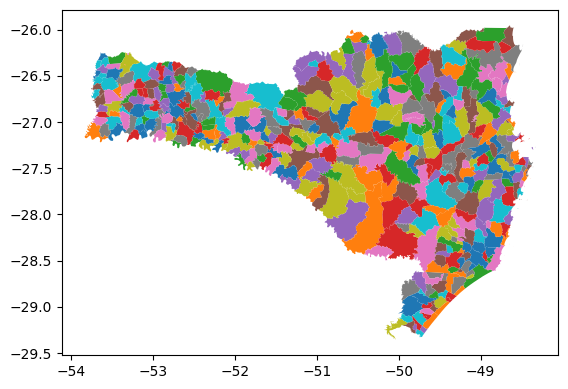

In [10]:
# Plotando usando uma coluna do geodata para colorir o mapa

geodata.plot(column = 'v0001')

<Axes: >

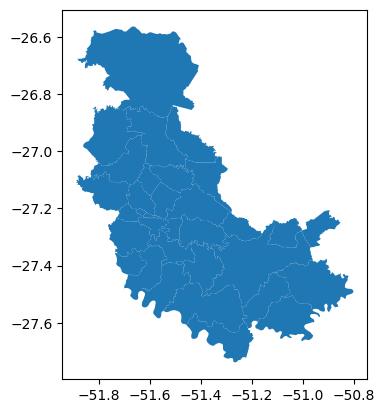

In [7]:
# Selecionar uma região de interesse

cod = '420008'
geodata[ geodata['CD_RGI'] == cod].plot()

## Abrindo arquivos com focos de queimadas no mundo.
Fonte de dados: https://www2.acom.ucar.edu/modeling/finn-fire-inventory-ncar

Acesso para download: https://rda.ucar.edu/datasets/d312009/dataaccess/#

Ou arquivo de um único dia: https://www.acom.ucar.edu/acresp/MODELING/finn_emis_txt/FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt.gz

In [23]:
'''# Utilizando script para download

import sys, os
from urllib.request import build_opener

opener = build_opener()

filelist = [
  'https://data.rda.ucar.edu/d312009/2003_eachfire_modis/FINNv2.5_mod_GEOSCHEM_2003_c20211213.txt.gz'
]

for file in filelist:
    ofile = os.path.basename(file)
    sys.stdout.write("downloading " + ofile + " ... ")
    sys.stdout.flush()
    infile = opener.open(file)
    outfile = open(ofile, "wb")
    outfile.write(infile.read())
    outfile.close()
    sys.stdout.write("done\n")
'''

'# Utilizando script para download\n\nimport sys, os\nfrom urllib.request import build_opener\n\nopener = build_opener()\n\nfilelist = [\n  \'https://data.rda.ucar.edu/d312009/2003_eachfire_modis/FINNv2.5_mod_GEOSCHEM_2003_c20211213.txt.gz\'\n]\n\nfor file in filelist:\n    ofile = os.path.basename(file)\n    sys.stdout.write("downloading " + ofile + " ... ")\n    sys.stdout.flush()\n    infile = opener.open(file)\n    outfile = open(ofile, "wb")\n    outfile.write(infile.read())\n    outfile.close()\n    sys.stdout.write("done\n")\n'

In [26]:
# Enquanto isso...
# Criando um dataframe com pontos e transformando em geodataframe
import pandas as pd
dataSample = pd.DataFrame({'lon':[-48], 'lat':[-27], 'fire':[10]})

# Conversão para geodataframe
gdf = gpd.GeoDataFrame(
    dataSample, geometry = gpd.points_from_xy(dataSample.lon, dataSample.lat),crs='EPSG:4326'
)

gdf.head()

,lon,lat,fire,geometry
0,-48,-27,10,POINT (-48 -27)


In [28]:
# Plotando mapa no espaço
# Instalar pacotes branca folium mapclassify

#gdf.explore()

In [32]:
#### Abrindo arquivo do FINN - queimadas e emissões no mundo no dia 08/07/24

pathFinn = r"C:\Users\bruno\Desktop\UFSC\2024.2\ENS410064\2024\dados_entrada\FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt"

finn = pd.read_csv(pathFinn)
print('Este é o número de queimadas nesta data: '+ str(finn.shape[0]))
finn.head()

Este é o número de queimadas nesta data: 77396


,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,C3H8,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE
0,190,1,1,2,68.983,143.080,666800.0,2.784,70930000.0,4443000.0,...,16580.0,111900.0,3684.0,0.0,0.0,55710.0,38680.0,75050.0,52950.0,1381.0
1,190,1,2,2,68.998,143.064,538300.0,2.784,57260000.0,3587000.0,...,13380.0,90330.0,2974.0,0.0,0.0,44980.0,31220.0,60590.0,42750.0,1115.0
2,190,1,3,2,68.997,143.082,455400.0,2.784,48440000.0,3034000.0,...,11320.0,76410.0,2516.0,0.0,0.0,38050.0,26410.0,51250.0,36160.0,943.3
3,190,1,4,2,68.999,143.040,424900.0,2.784,45200000.0,2831000.0,...,10560.0,71300.0,2347.0,0.0,0.0,35500.0,24650.0,47820.0,33740.0,880.2
4,190,2,5,2,68.879,140.521,433500.0,2.784,46110000.0,2888000.0,...,10770.0,72730.0,2394.0,0.0,0.0,36220.0,25140.0,48790.0,34420.0,897.9


In [34]:
# Transformar dataframe do Finn em geodataframe

gdf = gpd.GeoDataFrame(
    finn, geometry = gpd.points_from_xy(finn.LONGI, finn.LATI), crs='EPSG:4326'
)

gdf.head()

,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE,geometry
0,190,1,1,2,68.983,143.080,666800.0,2.784,70930000.0,4443000.0,...,111900.0,3684.0,0.0,0.0,55710.0,38680.0,75050.0,52950.0,1381.0,POINT (143.08 68.983)
1,190,1,2,2,68.998,143.064,538300.0,2.784,57260000.0,3587000.0,...,90330.0,2974.0,0.0,0.0,44980.0,31220.0,60590.0,42750.0,1115.0,POINT (143.064 68.998)
2,190,1,3,2,68.997,143.082,455400.0,2.784,48440000.0,3034000.0,...,76410.0,2516.0,0.0,0.0,38050.0,26410.0,51250.0,36160.0,943.3,POINT (143.082 68.997)
3,190,1,4,2,68.999,143.040,424900.0,2.784,45200000.0,2831000.0,...,71300.0,2347.0,0.0,0.0,35500.0,24650.0,47820.0,33740.0,880.2,POINT (143.04 68.999)
4,190,2,5,2,68.879,140.521,433500.0,2.784,46110000.0,2888000.0,...,72730.0,2394.0,0.0,0.0,36220.0,25140.0,48790.0,34420.0,897.9,POINT (140.521 68.879)


In [41]:
#gdf.explore()

<Axes: >

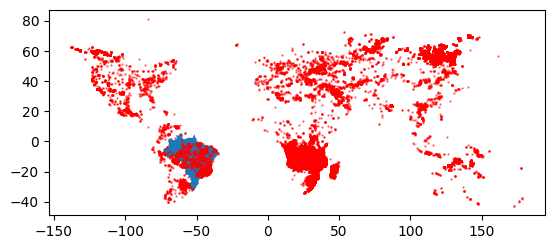

In [47]:
# Verificando focos de calor no mundo e no Brasil

# Abrindo shape do Brasil
shapeBR = gpd.read_file(r"C:\Users\bruno\Desktop\UFSC\2024.2\ENS410064\2024\dados_entrada\BR_Pais_2022\BR_Pais_2022.shp")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
shapeBR.plot(ax=ax)
gdf.plot(ax=ax, color = 'red', alpha=0.5, markersize=0.5)

In [51]:
#  Recortando para o Brasil
finnBR = gpd.clip(gdf,shapeBR.to_crs('EPSG:4326'))  #finnBR = gdf.clip(shapeBR.to_crs('ESG:4326'))

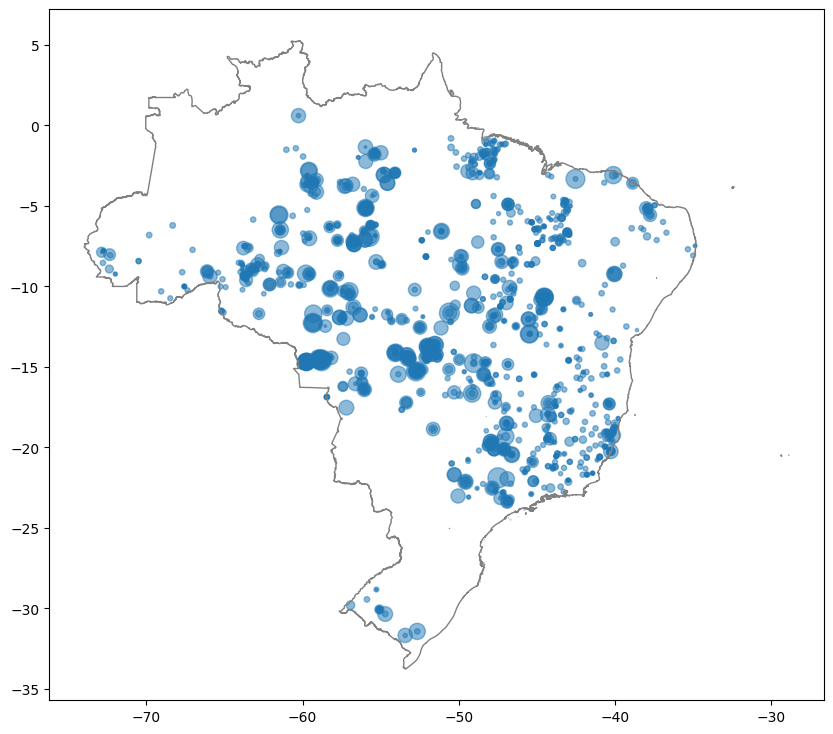

In [87]:
# Plotando
fig, ax = plt.subplots(figsize=(10,10))
shapeBR.boundary.plot(ax=ax, color='gray', linewidth=1)
#finnBR.plot(ax=ax, alpha=0.5, markersize=3, c=finnBR.AREA, cmap='Reds')

ax.scatter(finnBR.LONGI, finnBR.LATI, alpha=0.5, s=finnBR.AREA/finnBR.AREA.min())


In [68]:
# Cortando pontos por estado
shapeUF = gpd.read_file(r"C:\Users\bruno\Desktop\UFSC\2024.2\ENS410064\2024\dados_entrada\BR_UF_2022\BR_UF_2022.shp")
shapeUF = shapeUF.to_crs('EPSG:4326')
print(shapeUF)
fireInUF = []
for uf in  range(0, shapeUF.shape[0]):
    print(shapeUF.iloc[uf,:])
    finnUF = finnBR.clip(shapeUF.geometry[uf])
    fireInUF.append(finnUF)

   CD_UF                NM_UF SIGLA_UF       NM_REGIAO     AREA_KM2  \
0     12                 Acre       AC           Norte   164173.429   
1     13             Amazonas       AM           Norte  1559255.881   
2     15                 Pará       PA           Norte  1245870.704   
3     16                Amapá       AP           Norte   142470.762   
4     17            Tocantins       TO           Norte   277423.627   
5     21             Maranhão       MA      Nordeste\n   329651.496   
6     22                Piauí       PI      Nordeste\n   251755.481   
7     23                Ceará       CE      Nordeste\n   148894.447   
8     24  Rio Grande do Norte       RN      Nordeste\n    52809.599   
9     25              Paraíba       PB      Nordeste\n    56467.242   
10    26           Pernambuco       PE      Nordeste\n    98067.877   
11    27              Alagoas       AL      Nordeste\n    27830.661   
12    28              Sergipe       SE      Nordeste\n    21938.188   
13    

In [75]:
# Quantificando focos por estado

import numpy as np

dfUF = pd.DataFrame()
dfUF['UF'] = shapeUF.NM_UF
dfUF['fire_count'] = np.nan

for ii, fire in enumerate(fireInUF):
    print(shapeUF.NM_UF[ii] + ' ' + str(fire.shape[0]))
    dfUF['fire_count'][ii] = fire.shape[0]

dfUF

Acre 23
Amazonas 85
Pará 209
Amapá 0
Tocantins 74
Maranhão 106
Piauí 29
Ceará 13
Rio Grande do Norte 9
Paraíba 4
Pernambuco 3
Alagoas 0
Sergipe 0
Bahia 94
Minas Gerais 187
Espírito Santo 70
Rio de Janeiro 19
São Paulo 54
Paraná 1
Santa Catarina 0
Rio Grande do Sul 17
Mato Grosso do Sul 0
Mato Grosso 304
Goiás 58
Distrito Federal 4
Rondônia 57
Roraima 2


C:\Users\bruno\AppData\Local\Temp\ipykernel_10560\733070365.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfUF['fire_count'][ii] = fire.shape[0]
C:\Users\bruno\AppData\Local\Temp\ipykernel_10560\733070365.py:11: SettingWithCopyWarning

,UF,fire_count
0,Acre,23.0
1,Amazonas,85.0
2,Pará,209.0
3,Amapá,0.0
4,Tocantins,74.0
5,Maranhão,106.0
6,Piauí,29.0
7,Ceará,13.0
8,Rio Grande do Norte,9.0
9,Paraíba,4.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Acre'),
  Text(1, 0, 'Amazonas'),
  Text(2, 0, 'Pará'),
  Text(3, 0, 'Amapá'),
  Text(4, 0, 'Tocantins'),
  Text(5, 0, 'Maranhão'),
  Text(6, 0, 'Piauí'),
  Text(7, 0, 'Ceará'),
  Text(8, 0, 'Rio Grande do Norte'),
  Text(9, 0, 'Paraíba'),
  Text(10, 0, 'Pernambuco'),
  Text(11, 0, 'Alagoas'),
  Text(12, 0, 'Sergipe'),
  Text(13, 0, 'Bahia'),
  Text(14, 0, 'Minas Gerais'),
  Text(15, 0, 'Espírito Santo'),
  Text(16, 0, 'Rio de Janeiro'),
  Text(17, 0, 'São Paulo'),
  Text(18, 0, 'Paraná'),
  Text(19, 0, 'Santa Catarina'),
  Text(20, 0, 'Rio Grande do Sul'),
  Text(21, 0, 'Mato Grosso do Sul'),
  Text(22, 0, 'Mato Grosso'),
  Text(23, 0, 'Goiás'),
  Text(24, 0, 'Distrito Federal'),
  Text(25, 0, 'Rondônia'),
  Text(26, 0, 'Roraima')])

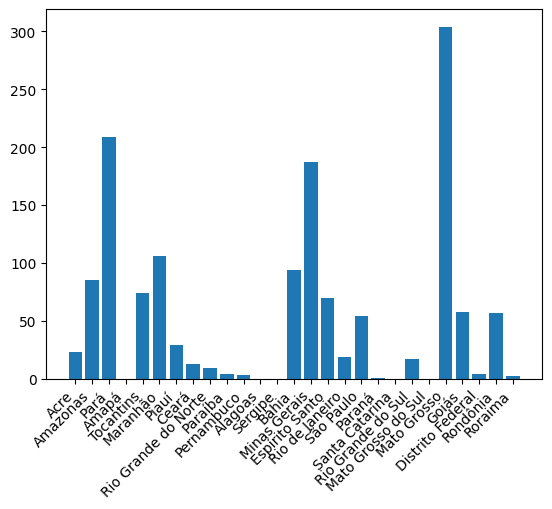

In [99]:
# Plotando
fig, ax = plt.subplots()
ax.bar(dfUF.UF, dfUF.fire_count)
plt.xticks(rotation=45, ha='right')

# Dados tipo raster

Trabalharemos com a biblioteca rasterio
- pip install rasterio

Baixem o SRTM utilizando a plataforma do EZ-AERMOD do professor hoinaski

A documentação do pacote está no site do rasterio

In [100]:
import rasterio

In [104]:
# Abrindo arquivo do SRTM usando o rasterio

dataset = rasterio.open(r"C:\Users\bruno\Desktop\UFSC\2024.2\ENS410064\2024\dados_entrada\EZ_AERMOD_BrunoJalowski_2024-11-14 (1)\mergedSRTM.tif")

In [106]:
# Determinando tamanho do dataset
print(dataset.height)
print(dataset.width)
print(dataset.bounds)

3371
3614
BoundingBox(left=-49.295972222222225, bottom=-26.765694444444442, right=-48.29208333333334, top=-25.829305555555553)


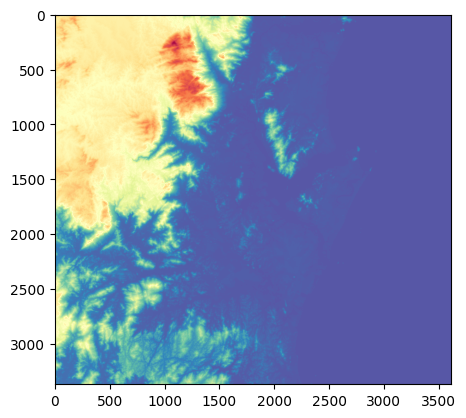

In [111]:
fig, ax = plt.subplots()
ax.imshow(dataset.read(1), cmap='Spectral_r')


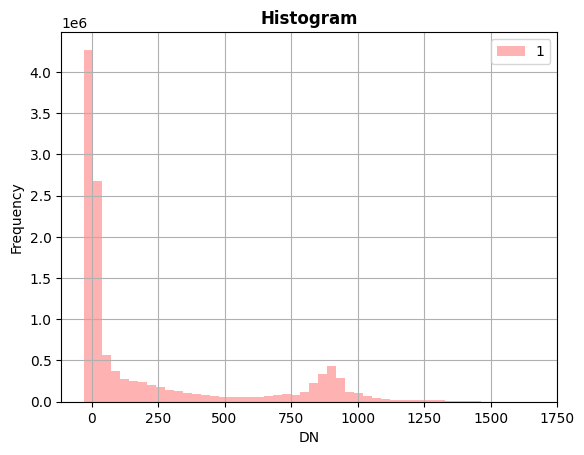

In [113]:
from rasterio.plot import show_hist
show_hist(
    dataset, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram'
)

In [115]:
# Transformar para um array numpy
import numpy as np
arr = np.array(dataset.read(1))

arr.shape

(3371, 3614)

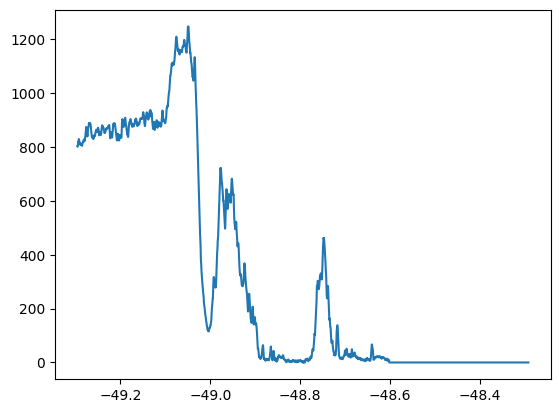

In [126]:
# Acessando matriz arr
height = dataset.shape[0]
width = dataset.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rasterio.transform.xy(dataset.transform, rows, cols)
lons = np.array(xs)
lats = np.array(ys)

xlon = xs.reshape(arr.shape)

plt.plot(xlon[1000,:], arr[1000,:])